In [362]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from unidecode import unidecode
from operator import itemgetter
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from operator import itemgetter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [363]:
url = "https://www.datos.gov.co/resource/v98q-23dp.json?$query=SELECT%0A%20%20%60titulo%60%2C%0A%20%20%60descripcion%60%2C%0A%20%20%60url_lista_de_reproduccion%60%2C%0A%20%20%60plataforma%60"


In [364]:
response = requests.get(url)

In [365]:
if response.status_code == 200:
    # La solicitud fue exitosa
    data = response.json()  # Obtener los datos de respuesta en formato JSON
    df = pd.DataFrame(data)  # Crear un DataFrame a partir de los datos
    

In [366]:

palabras = defaultdict(int)

In [367]:
for titulo in df["titulo"]:
    palabras_titulo = titulo.lower().split()
    #unidecode para eliminar las tildes de las palabras y convertirlas a minúsculas
    palabras_titulo = titulo.lower().replace(",", "").split()
    palabras_titulo = [unidecode(palabra) for palabra in palabras_titulo]
    for palabra in palabras_titulo:
        palabras[palabra] += 1
    

In [368]:
# Obtener el número total de palabras únicas
num_palabras_unicas = len(palabras)

# Obtener el número total de repeticiones
num_repeticiones = sum(palabras.values())

print("Número total de palabras únicas:", num_palabras_unicas)
print("Número total de repeticiones:", num_repeticiones)


Número total de palabras únicas: 2243
Número total de repeticiones: 8758


In [369]:
vectorizer = CountVectorizer()
vectorizer = CountVectorizer(stop_words=[",", "de", "lo", "que", "la", "en", "el", "los", "a", "del", "y", "todo", "un", "nos", ".", "in", ","]
)

X = vectorizer.fit_transform(df["titulo"])


In [370]:
# Obtener las palabras y sus índices en la matriz

vocabulario = vectorizer.vocabulary_
indices = list(range(len(vocabulario)))
# Crear el dataframe con la matriz de conteo de palabras
df_matriz = pd.DataFrame(X.toarray(), columns=vocabulario)

print(df_matriz)

     urbílogo  bogotá  dominguera  historias  bici  sibaté  pedalea  su  \
0           0       0           0          0     0       0        0   0   
1           0       0           0          0     0       0        0   0   
2           0       0           0          0     0       0        0   0   
3           1       0           0          0     0       0        0   0   
4           0       0           0          0     0       0        0   0   
..        ...     ...         ...        ...   ...     ...      ...  ..   
995         0       0           0          0     0       0        0   0   
996         0       0           0          0     0       0        0   0   
997         0       0           0          0     0       0        0   0   
998         0       0           0          0     0       0        0   0   
999         0       0           0          0     0       0        0   0   

     pasado  today  ...  víctor  firmes  nn  118  soto  justicia  identidad  \
0         0      0  

In [371]:
# Extraer las palabras y las repeticiones en listas separadas
palabras_comunes = [palabra[0] for palabra in top_10_palabras]
repeticiones = [palabra[1] for palabra in top_10_palabras]


In [372]:

top_10_palabras = sorted(palabras.items(), key=itemgetter(1), reverse=True)[:10]
stop_words=[",", "de", "lo", "que", "la", "en", "el", "los", "a", "del", "y", "todo", "un", "nos", ".", "in", ",", "-", "vemos"]
# Crear el CountVectorizer con las stopwords
count_vectorizer = CountVectorizer(stop_words=stop_words)

# Obtener la matriz de conteo de palabras
X = count_vectorizer.fit_transform(df["titulo"])

# Calcular el número total de palabras en cada título
num_palabras_por_titulo = X.sum(axis=1)
# Dividir la matriz de conteo de palabras por el número total de palabras en cada título
X_normalized = X / num_palabras_por_titulo



# Crear el TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False, norm="l1")

# Obtener la matriz TF-IDF normalizada
X_tfidf = tfidf_transformer.fit_transform(X)

# Crear un dataframe con la matriz TF-IDF Term Frequency
df_matriz_nueva = pd.DataFrame(X_tfidf.toarray(), columns=count_vectorizer.get_feature_names_out())

print(df_matriz_nueva)

      00   01   02   03   04   05   06   07   08   09  ...  ángel  ávila  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3    0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

     édgar  étienne  étnica  ícono  órbita  óscar  última  último  
0      0.0      0.0

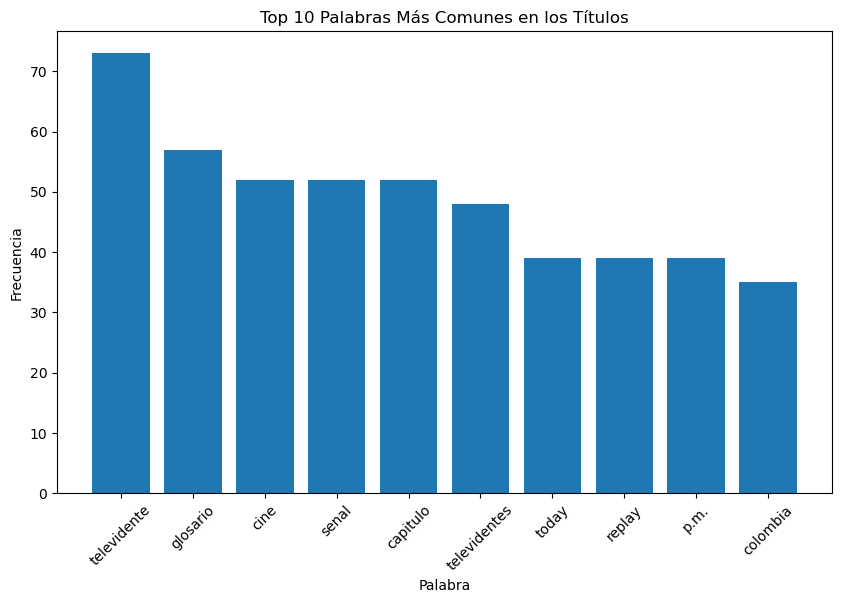

In [373]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_comunes, repeticiones)
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.title("Top 10 Palabras Más Comunes en los Títulos")
plt.xticks(rotation=45)
plt.show()

In [374]:
#Como estas palabras no son útiles las bamos a eliminar 


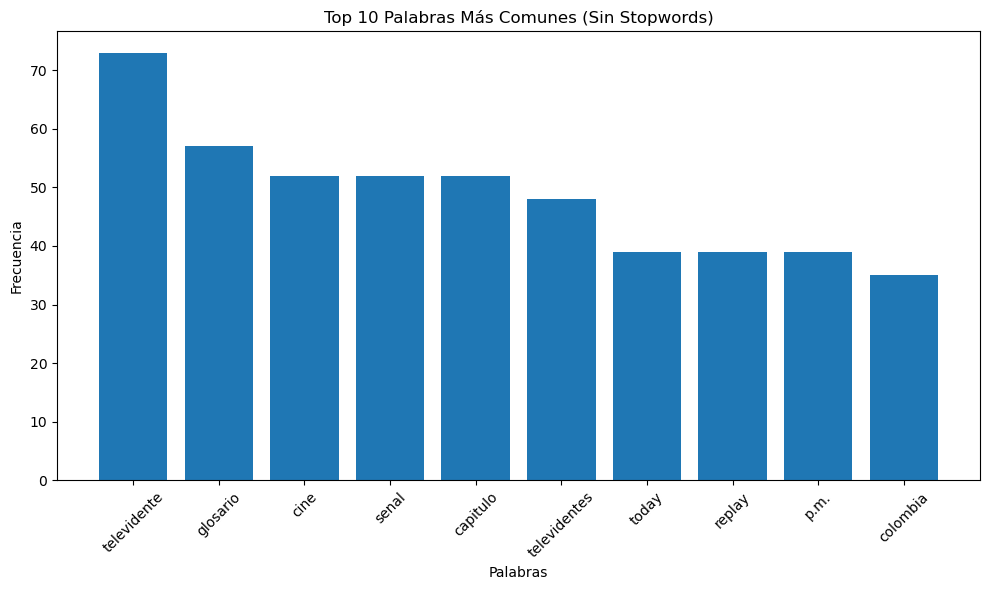

In [375]:
top_10_palabras = sorted([(palabra, frecuencia) for palabra, frecuencia in palabras.items() if palabra not in stop_words],
                         key=itemgetter(1), reverse=True)[:10]
# Obtener las palabras y las frecuencias para el gráfico de barras
palabras_grafico = [palabra for palabra, _ in top_10_palabras]
frecuencias_grafico = [frecuencia for _, frecuencia in top_10_palabras]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_grafico, frecuencias_grafico)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Top 10 Palabras Más Comunes (Sin Stopwords)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [376]:
# Calcular el vector IDF
num_titulos = X.shape[0]
num_documentos_con_palabra = np.sum(X > 0, axis=0)
idf = np.log(num_titulos / (num_documentos_con_palabra + 1))

print("Vector IDF:")
print(idf)
print(num_documentos_con_palabra)

Vector IDF:
[[3.35240722 4.96184513 6.2146081  ... 4.96184513 6.2146081  5.80914299]]
[[34  6  1 ...  6  1  2]]


In [377]:
# Multiplicar la matriz TF por el vector IDF
X_tfidf_weighted = X_tfidf.multiply(idf)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_weighted, df["titulo"], test_size=0.2, random_state=42)


In [378]:
# Entrenar modelos
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [379]:
# Predecir las categorías para los datos de prueba
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbm = gbm.predict(X_test)


In [384]:
# Calcular las métricas
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average="weighted")
recall_logreg = recall_score(y_test, y_pred_logreg, average="weighted")

C:\Users\smejia\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smejia\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [385]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average="weighted")
recall_rf = recall_score(y_test, y_pred_rf, average="weighted")

C:\Users\smejia\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smejia\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [386]:
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average="weighted")
recall_gbm = recall_score(y_test, y_pred_gbm, average="weighted")

C:\Users\smejia\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smejia\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [389]:
# Imprimir las métricas
print("Métricas del modelo de Regresión Logística:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print()

print("Métricas del modelo de Random Forest:")
print("Accuracy:", accuracy_gbm)

Métricas del modelo de Regresión Logística:
Accuracy: 0.005
Precision: 0.005
Recall: 0.005

Métricas del modelo de Random Forest:
Accuracy: 0.005
